# Clustering Assignment

## The following steps will be performed on the given dataset:

1. Data Quality Check

2. EDA: Univariate and Bivariate

3. Outlier

4. Hopkin's Test

5. Scaling

6. K-Means Clustering:
    a. Find the best value of k using SSD Elbow, Silhouette Score
    b. Using the final value of k, perform the kMeans analysis

7. Visualize it using scatterplot

8. Perform Cluster profiling: __GDPP, CHILD_MORT and INCOME.__

9. Hierarchical Clustering: Single linkage, Complete Linkage

Steps 4 to 9 will be repeated twice: once by keeping the outliers and again by removing the outliers

### Importing the libraries and the dataset

In [1]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset
country_data = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Quality Check

In [4]:
# Checking shape of the dataset
country_data.shape

(167, 10)

In [5]:
# Checking data types of the columns
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


We can see that all columns are numerical except for the 'country' column

In [6]:
# Describing the dataset
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Cheecking for missing values
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no missing values and hence we can proceed with our next step for data analysis

Changing the column 'health', 'imports' and 'exports' percentage of Total GDP into 'health', 'imports' and 'exports' percentage of total gdpp for making dataset complete sense.

In [8]:
# Converting exports,imports and health spending percentages to absolute values.
country_data['health']=(country_data['health']*country_data['gdpp'])/100
country_data['imports']=(country_data['imports']*country_data['gdpp'])/100
country_data['income']=(country_data['income']*country_data['gdpp'])/100
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


In [9]:
# Remove the non-numerical column i.e. 'Country'
country_data.set_index('country',inplace=True)
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


Now, we can go ahead to check for outliers in our dataset

### EDA: Univariate and Bivariate Analysis

In [10]:
# Listing the columns found in the dataset
country_data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [11]:
# Create a separate array with column names
columns = list(country_data.columns)

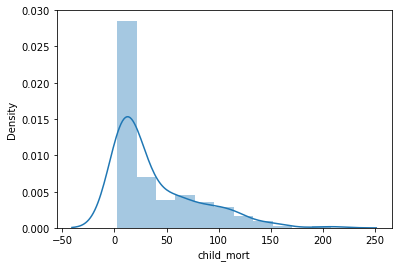

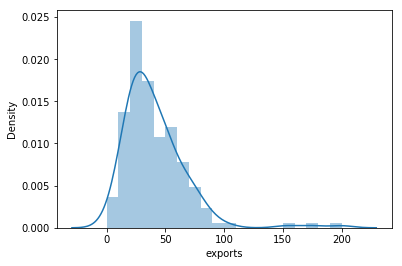

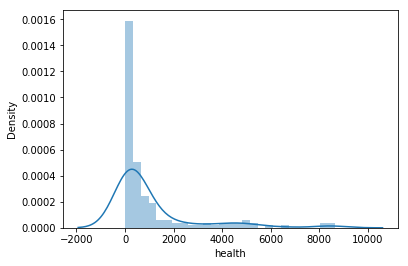

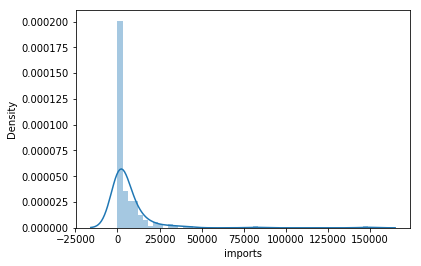

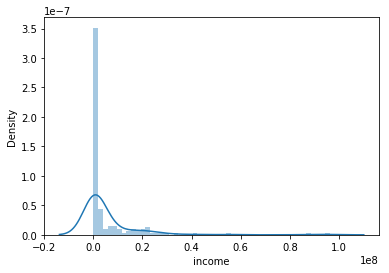

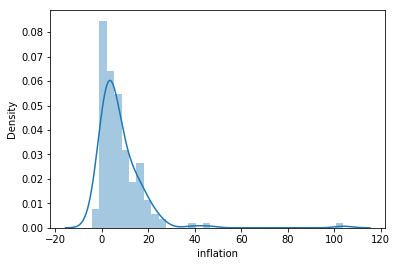

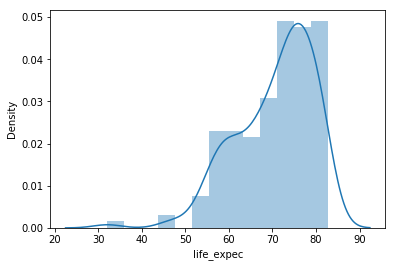

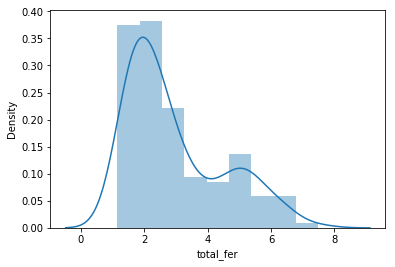

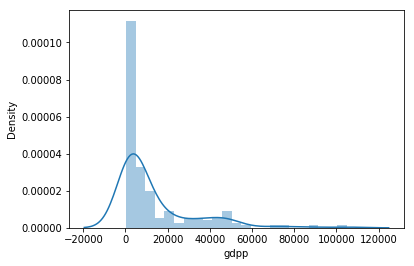

In [12]:
# Distribution of the columns: distplot()
for cols in columns:
    sns.distplot(country_data[cols])
    plt.show();

#### Inference from the above plots:
1. The columns 'income', 'health' and 'imports' are normally distributed, we can say that they do not have any internal groupings.
2. The columns 'life_expec', 'gdpp' and 'total_fer'seem to be bimodal distributions, hence there may exist some internal grouping.
3. The remaining columns are not normally distributed as their mean is not at 0, which means there could be skewness in the data or the underlying distribution is non-normal.

In [13]:
# Checking the correlation between the variables
country_data[columns].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.430438,-0.319138,-0.325432,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,0.252193,0.702031,0.448012,-0.107294,0.316313,-0.320011,0.418725
health,-0.430438,0.252193,1.000000,0.638581,0.721281,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.702031,0.638581,1.000000,0.782335,-0.179458,0.397515,-0.317061,0.755114
income,-0.325432,0.448012,0.721281,0.782335,1.000000,-0.137295,0.426005,-0.302293,0.900701
inflation,0.288276,-0.107294,-0.253956,-0.179458,-0.137295,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.545626,0.397515,0.426005,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.407984,-0.317061,-0.302293,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.916593,0.755114,0.900701,-0.221631,0.600089,-0.454910,1.000000


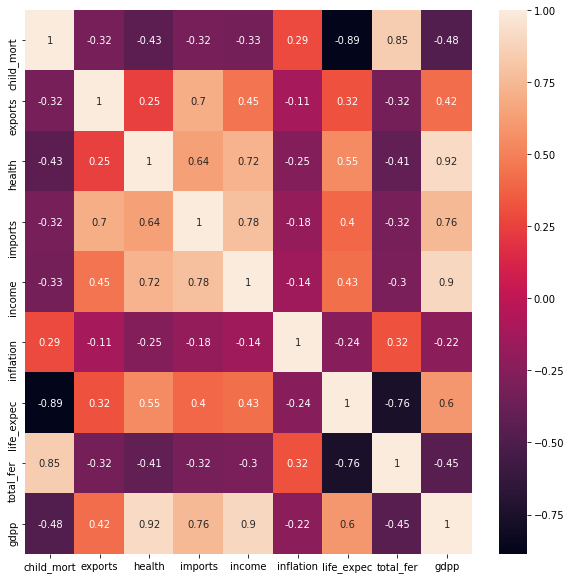

In [14]:
# Plotting the correlations using heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(country_data[columns].corr(), annot=True);

#### Inferences from the above plot:
1. The columns 'health' & 'gdpp', 'child_mort' & 'total_fer', 'income' & 'gdpp' are high positive correlation
2. The following set of columns are moderately & positively correlated: 'health' & 'imports', 'health' & 'income', 'exports' & 'imports', 'imports' & 'income', 'imports' & 'gdpp', 'life_expec' & 'gdpp'
3. There are columns like 'life_expec', 'child_mort', 'total_fer' having high negative correlation. This shows that the data has multicolinearity.

### Outlier Analysis

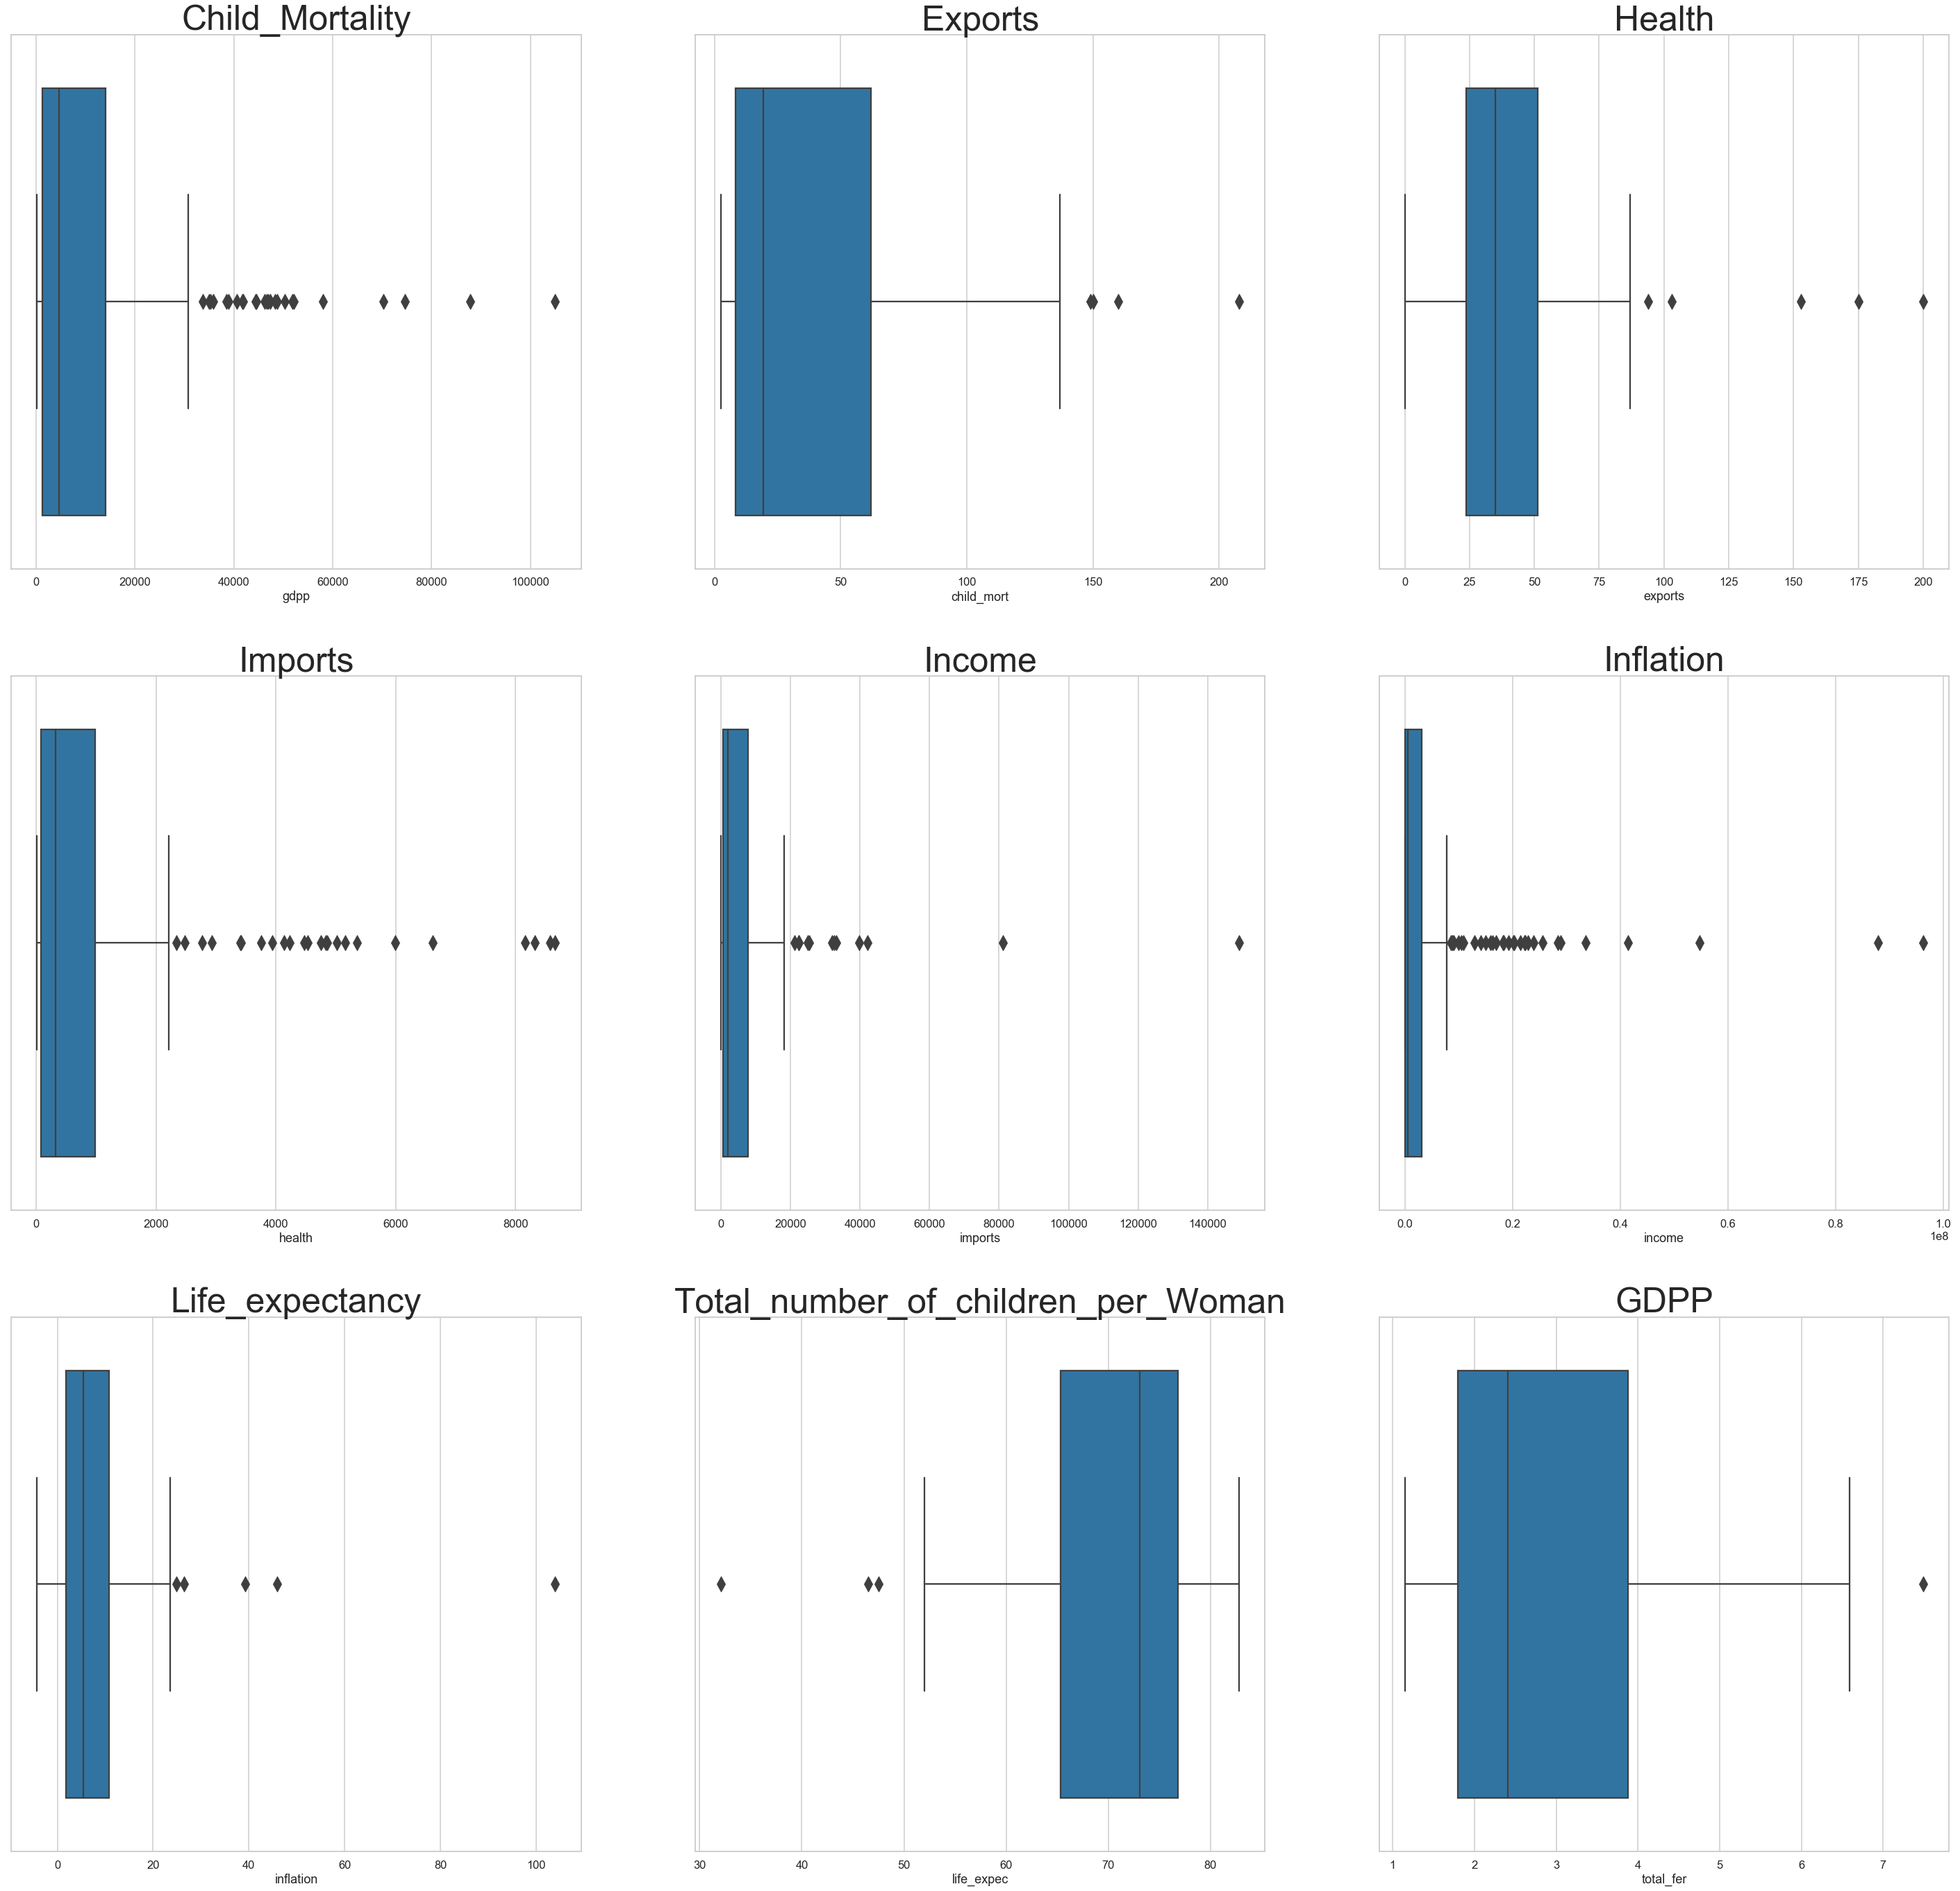

In [15]:
# Setting size of figure, context and gridlines
plt.figure(figsize=(50,150))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title names for the columns in the dataset
col={0:'Child_Mortality',1:'Exports',2:'Health',3:'Imports',4:'Income',5:'Inflation',
     6:'Life_expectancy',7:'Total_number_of_children_per_Woman',8:'GDPP'}

# Visualising the outliers with boxplot for all the variables 
for i in range(9):
    plt.subplot(9,3,i+1)
    plt.title(col[i],fontsize=50)
    sns.boxplot(x = country_data.columns[i-1], data = country_data, fliersize = 15)

From the above boxplots, we can see that every component has outliers. Now, we need to decide whether to remove them or keep them. We will use the below two approaches:
1. Keep the outliers and do the clustering
2. Remove the outliers and do the clustering

### Hopkins Test

In [16]:
# Importing relevant packages
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [17]:
# Calculating the Hopkins statistic
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
# How different your date is from the randomly scattered data?
hopkins(country_data)

0.9882179110685256

Our data is 98.82% different from randomly scattered data. Since the Hopkins test returned a high value, it is a very good candidate to perform clustering.

## Approach 1: Performing clustering without removing outliers

### Rescaling the dataset

In [19]:
# Importing the scaling library - StandardScaler
import sklearn
from sklearn.preprocessing import StandardScaler

In [20]:
# Scaling the dataset with Standard Scaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(country_data)
scaled_df = pd.DataFrame(scaled_df,columns = country_data.columns)
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,-0.565040,-0.432276,-0.419624,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.439218,-0.313677,-0.388521,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.484826,-0.353720,-0.375272,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-0.532363,-0.345953,-0.404013,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.178771,0.040735,-0.237868,-0.601749,0.704258,-0.541946,-0.041817


### K-Means Clustering

#### Analyzing the optimal k value

In [21]:
# Importing relevant datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Elbow Curve

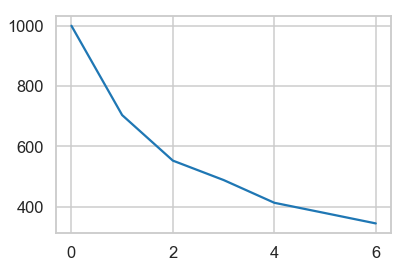

In [22]:
# Elbow curve/SSD
ssd = []
clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500)
    kmeans.fit(scaled_df)
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

#### Silhouette Analysis

In [23]:
# silhouette analysis
clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 500)
    kmeans.fit(scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.423670178948397
For n_clusters=3, the silhouette score is 0.38878163766741886
For n_clusters=4, the silhouette score is 0.3917167470893631
For n_clusters=5, the silhouette score is 0.39534538817824516
For n_clusters=6, the silhouette score is 0.4002761165678218
For n_clusters=7, the silhouette score is 0.286466642581359
For n_clusters=8, the silhouette score is 0.2849241605513297


We can go ahead with k=4 for our dataset as it seems relevant for the given business problem

#### Final model with k=4

In [24]:
# Final model with k=4
kmeans = KMeans(n_clusters = 4, max_iter = 500)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0,
       1, 3, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 1,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 3, 0, 0, 1, 3, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 1, 0, 3, 1, 3, 1, 3, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       3, 3, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 3, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0])

In [26]:
# Assign the labels to the dataset
country_data['cluster_id'] = kmeans.labels_
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,1


### Visualize it using scatterplot

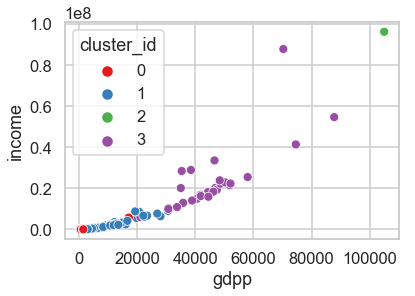

In [27]:
# Scatter plot for 'gdpp' vs 'income'
sns.scatterplot(x='gdpp', y='income', hue= 'cluster_id', data=country_data, palette='Set1')

#### Inferences from above plot:
1. Cluster 0 and cluster 1 are of a relatively low gddp and low income group.
2. Cluster 2 and cluster 3 are of high gdpp and higher income groups.

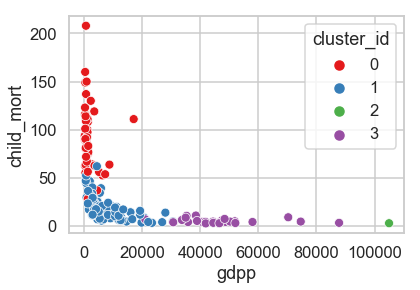

In [28]:
# Scatter plot for 'gdpp' vs 'child_mort'
sns.scatterplot(x='gdpp', y='child_mort', hue= 'cluster_id', data=country_data, palette='Set1')

#### Inferences from above plot:
1. Cluster 0 and cluster 1 have high child mortality and a low gdpp values compared to other clusters.
2. Cluster 2 and cluster 3 are of higher gdpp and lower child mortality groups.

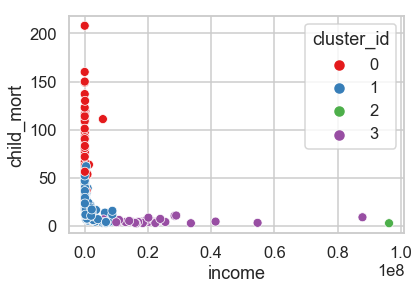

In [29]:
# Scatter plot for 'income' vs 'child_mort'
sns.scatterplot(x='income', y='child_mort', hue= 'cluster_id', data=country_data, palette='Set1')

#### Inferences from above plot:
1. Cluster 0 and cluster 1 have high child mortality and very low income values compared to other clusters.
2. Cluster 2 and cluster 3 are of higher income and much lower child mortality groups.

### Perform Cluster Profiling: __GDPP, CHILD_MORT and INCOME.__

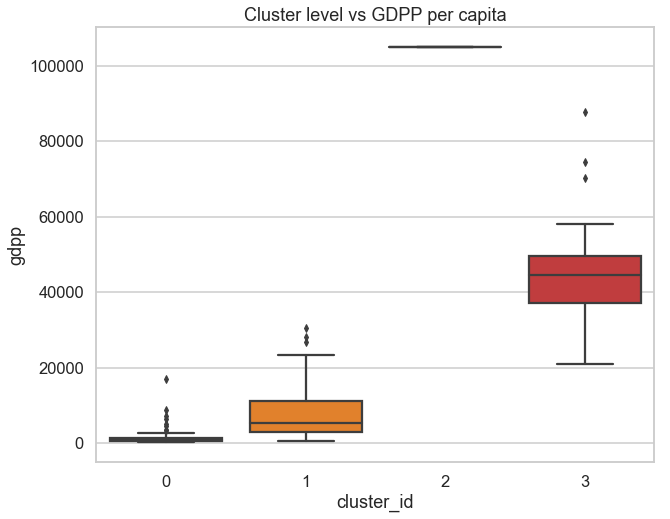

In [30]:
# Visualising the distribution of the cluster labels for column 'gdpp'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs GDPP per capita')
sns.boxplot(x='cluster_id',y='gdpp',data=country_data)

#### Inferences from the above box plots for GDPP (GDP per capita):

1. Cluster label 0: Having the lowest gdpp compared to all the other clusters with some outliers
2. Cluster label 1: Most of the countries in this cluster are having little high gdpp than the lowest gdpp group. There are a few outliers as well.
3. Cluster label 2: Having the highest gdpp among all other clusters.
4. Cluster label 3: Having higher gdpp with some outliers.

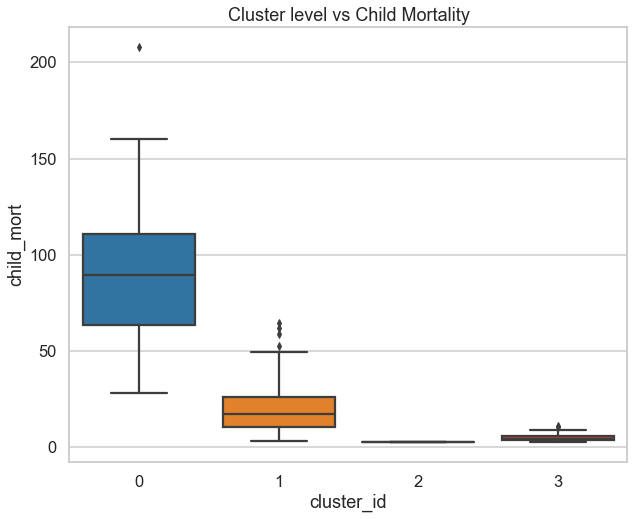

In [31]:
# Visualising the distribution of the cluster labels for column 'child_mort' using boxplot
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Child Mortality')
sns.boxplot(x='cluster_id',y='child_mort',data=country_data)

#### Inferences from the above box plots for Child Mortality (Death of children under 5 years of age per 1000 live births):

1. Cluster label 0 : Has the highest child mortality among the clusters.
2. Cluster label 1 : Has second highest child mortality with few outliers.
3. Cluster label 2 : Has the lowest child mortality among the clusters.
4. Cluster label 3 : Has a low child mortality with very few outliers.

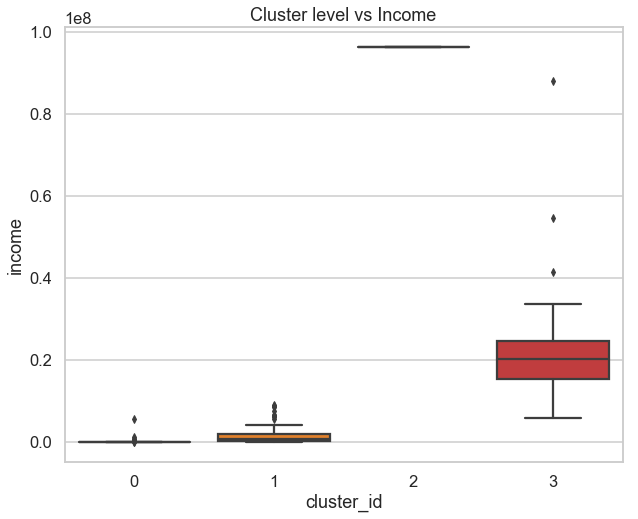

In [32]:
# Visualising the distribution of the cluster labels for column 'income'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Income')
sns.boxplot(x='cluster_id',y='income',data=country_data)

#### Inferences from the above box plots for Income level (Net income per person):

1. Cluster label 0: Has the lowest income with few outliers.
2. Cluster label 1: Has a very low child mortality with few outliers.
3. Cluster label 2: Has the highest child mortality among the clusters.
4. Cluster label 3: Has the second highest child mortality with few outliers.

#### In summary, we can infer the following points from the above boxplots:

1. Cluster label 0: Has the lowest income and lowest gdpp and the highest mortality rate.
2. Cluster label 1: Has a relatively higher income and gdpp and a lower mortality rate.
3. Cluster label 2: Has the highest income and gdpp and lowest mortality among the clusters.
4. Cluster label 3: Has a normal gdpp and income group with a normal child mortality.

### K-Means Insights (Approach 1)

In [65]:
# Finding the countries with cluster label=0
Country_need_help=pd.DataFrame(country_data[country_data['cluster_id']==0].index)
Country_need_help.shape

(48, 1)

There are totally 48 countries from the dataset in need of urgent help as they are having the lowest income, highest child mortality and lowest gdp per capita.

In [66]:
# Finding the countries with cluster label=2
Country_need_nohelp=pd.DataFrame(country_data[country_data['cluster_id']==2].index)
Country_need_nohelp.shape

(1, 1)

Only 1 country are there having good socio-economic and health factors.

### Hierarchial Clustering: Single Linkage, Complete Linkage

In [35]:
# Importing the relevant datasets
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

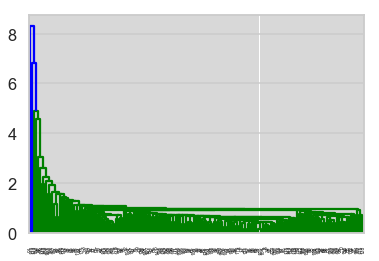

In [36]:
# Single linkage
mergings = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

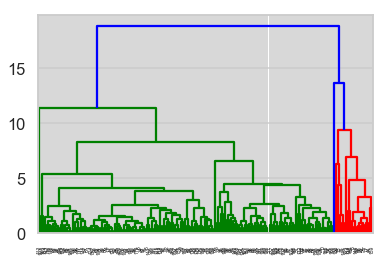

In [37]:
# Complete linkage
mergings = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

From the above dendrogram, we can proceed with 3 cluster

In [38]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [39]:
# Assign cluster labels
country_data['cluster_labels'] = cluster_labels
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0,0
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,1,0
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,1,0
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0,0
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,1,0


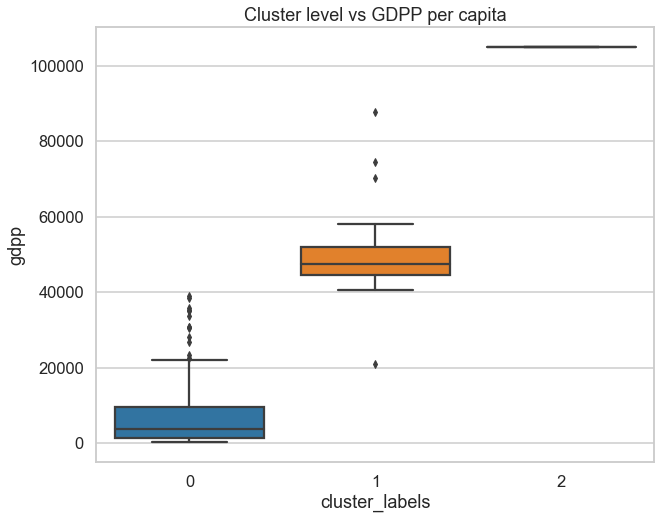

In [40]:
# Visualising the distribution of the cluster labels for column 'gdpp'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs GDPP per capita')
sns.boxplot(x='cluster_labels',y='gdpp',data=country_data)

#### Inferences from the above boxplot:

1. Cluster 0: gdpp is the lowest among the clusters with some outliers
2. Cluster 1: gdpp of this cluster is in between the other two with few outliers.
3. Cluster 2: gdpp highest compared to other clusters.

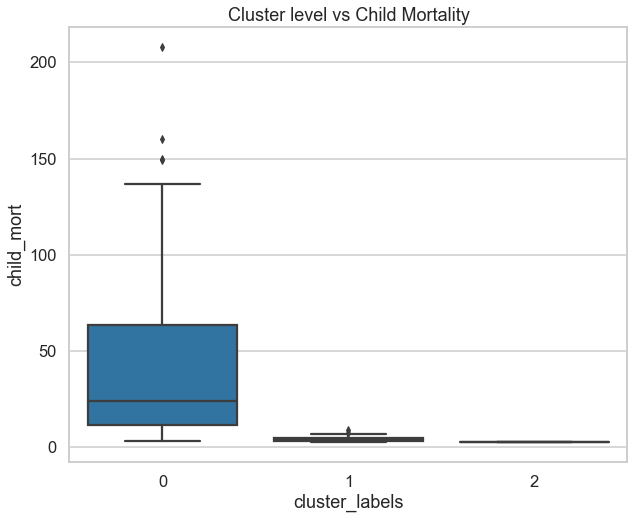

In [41]:
# Visualising the distribution of the cluster labels for column 'child_mort' using boxplot
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Child Mortality')
sns.boxplot(x='cluster_labels',y='child_mort',data=country_data)

#### Inferences from the above boxplot:

1. Cluster 0: Mortality of children is the highest compared to other clusters with very few outliers.
2. Cluster 1: Mortality of children is considerably less with very few outliers.
3. Cluster 2: Mortality of children is the least compared to other clusters.

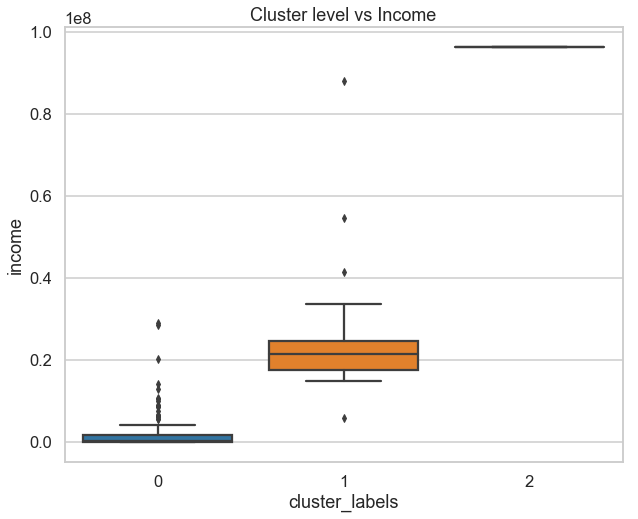

In [42]:
# Visualising the distribution of the cluster labels for column 'income'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Income')
sns.boxplot(x='cluster_labels',y='income',data=country_data)

#### Inferences from the above boxplot:

1. Cluster 0: Income is the lowest compared to the other clusters.
2. Cluster 1: Income is higher with a few outliers.
3. Cluster 2: Income is the highest compared to the other clusters.

#### In summary, we can infer the following points from the above boxlots:

1. Cluster 0: GDPP and income is the lowest compared to other clusters, Mortality of children is the highest compared to other clusters.
2. Cluster 1: Behaves normally in all departments (income, gdpp and children mortality) except for some outliers.
3. Cluster 2: GDPP and income is highest compared to other clusters, Mortality of children is the least compared to other clusters.

### Hierarchical Clustering Insights (Approach 1)

In [43]:
# Finding the countries with cluster label=o as it shows they are not developed
Country_need_help_hier=pd.DataFrame(country_data[country_data['cluster_labels']==0].index)
Country_need_help_hier.shape

(147, 1)

There are 147 countries identified from the hierarchical analysis that need urgent help as they have the lowest income, highest child mortality and lowest gdp per capita.

In [44]:
# Finding the countries with cluster label=3 as it shows they are developed
Country_need_nohelp_hier=pd.DataFrame(country_data[country_data['cluster_labels']==2].index)
Country_need_nohelp_hier.shape

(1, 1)

There is only 1 country found from the hierarchical analysis in need of urgent help/aid as it is having lowest income, high child mortality and low gdp per capita.

## Conclusion - Approach 1
### K-Means vs Hierarchical Clustering
#### K-means clustering :
1. Countries that are direst need of aid:
    1. Total 48 countries are in this category
2. Countries that are having good socio-economic and health factors:
    1. Only 1 country is in this category - Luxembourg

#### Hierarchical clustering:
1. Countries that are direst need of aid
    1. Total 147 countries are in this category
2. Countries that are having good socio-economic and health factors
    1. Only 1 country is in this category - Luxembourg

We have seen from both K-Means and Hierarchical clustering methods that hierarchical clustering selects an extra 99 countries. I would choose the final countries from k-means clustering as it gave a more accurate output compared to hierarchical clustering. I have compared the clusters and visualized from both methods and K-means gave more precise information than hierarchical clustering.

## Approach 2: Removing outliers and performing clustering again

### Removing the outliers

In [45]:
# Removing statistical ouliers from the dataset from all the columns
new_country_data=country_data
col=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
# using IQR method to remove the outliers
for i in range(len(col)):
    lower=new_country_data[col[i]].quantile(0.05)   # selecting lower quartile
    upper=new_country_data[col[i]].quantile(0.95)   # selecting higher quartile
    IQR=upper-lower                                 
    # storing new dataset with removed extreme outliers
    new_country_data=new_country_data[(new_country_data[col[i]] >=lower - 1.5*IQR) & (new_country_data[col[i]] <=upper + 1.5*IQR)]

### Rescaling the dataset

In [46]:
# Scaling the dataset with Standard Scaler
scaler = StandardScaler()
new_scaled_df = scaler.fit_transform(new_country_data)
new_scaled_df = pd.DataFrame(new_scaled_df,columns = new_country_data.columns)
new_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,1.303466,-1.319031,-0.562023,-0.648685,-0.503298,0.289329,-1.612381,1.911315,-0.702455,-1.072599,-0.341231
1,-0.545781,-0.508144,-0.431204,-0.422310,-0.455173,-0.370665,0.666389,-0.870331,-0.483620,-0.019384,-0.341231
2,-0.276937,-0.039632,-0.478624,-0.498742,-0.434674,1.177320,0.689063,-0.043175,-0.460727,-0.019384,-0.341231
3,2.027084,1.037045,-0.528049,-0.483915,-0.479145,2.017312,-1.170232,2.138116,-0.518267,-1.072599,-0.341231
4,-0.704073,0.280218,-0.160414,0.254178,-0.222070,-0.777327,0.723074,-0.550142,0.018150,-0.019384,-0.341231


### K-Means Clustering

#### Analyzing the optimal k value

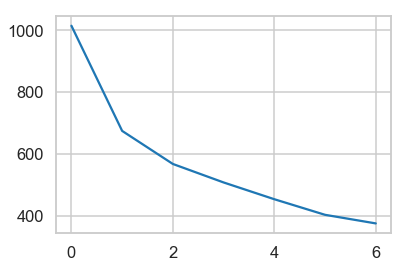

In [47]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500)
    kmeans.fit(new_scaled_df)    
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

#### Silhouette Analysis

In [48]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 500)
    kmeans.fit(new_scaled_df)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(new_scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5297678399035708
For n_clusters=3, the silhouette score is 0.4005075430106541
For n_clusters=4, the silhouette score is 0.34931356620635323
For n_clusters=5, the silhouette score is 0.3398456050978124
For n_clusters=6, the silhouette score is 0.29495161627549393
For n_clusters=7, the silhouette score is 0.28346480847515404
For n_clusters=8, the silhouette score is 0.24371397409320172


We can go ahead with k=3 for our dataset as it seems relevant for the given business problem

#### Final model with k=3

In [49]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter = 500)
kmeans.fit(new_scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 1])

In [51]:
# Assign the labels to the dataset
new_country_data['cluster_id'] = kmeans.labels_
new_country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,1,0
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,2,0
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,2,0
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,1,0
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,2,0


### Visualize it using scatterplot

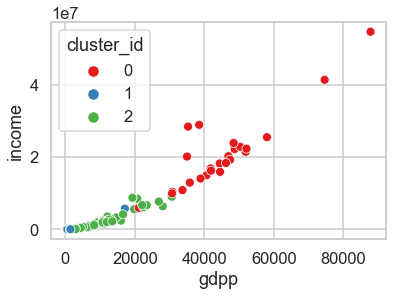

In [52]:
# Scatter plot for 'gdpp' vs 'income'
sns.scatterplot(x='gdpp', y='income', hue= 'cluster_id', data=new_country_data, palette='Set1')

#### Inferences from the above plot:
1. Cluster 1 is a low income and low gdpp group whereas cluster 2 is a mixture of both low and high gdpp and income.
2. Cluster 0 is a higher income and gdpp group, higher than clusters 1 and 2.

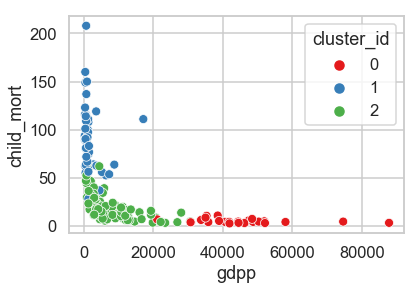

In [53]:
# Scatter plot for 'gdpp' vs 'child_mort'
sns.scatterplot(x='gdpp', y='child_mort', hue= 'cluster_id', data=new_country_data, palette='Set1')

#### Inferences from the above plot:
1. Cluster 1 is a high child mortality and low gdpp group whereas cluster 2 is a mixture of relatively lower child mortality and higher gdpp.
2. Cluster 0 is a higher gdpp and lower mortality group, the gdpp being higher than clusters 1 and 2 and mortality being lower than clusters 1 and 2.

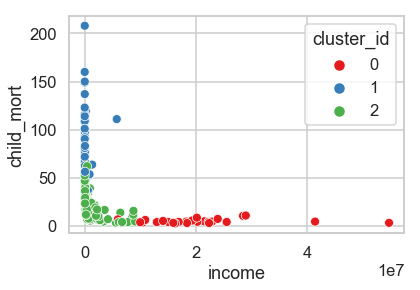

In [54]:
# Scatter plot for 'income' vs 'child_mort'
sns.scatterplot(x='income', y='child_mort', hue= 'cluster_id', data=new_country_data, palette='Set1')

#### Inferences from the above plot:
1. Cluster 1 is a high child mortality and low income group whereas cluster 2 is a mixture of relatively lower child mortality and higher income.
2. Cluster 0 is a higher income and lower mortality group, with the gdpp being higher than clusters 1 and 2 and mortality being lower than clusters 1 and 2 in some instances.

### Perform Cluster Profiling: __GDPP, CHILD_MORT and INCOME.__

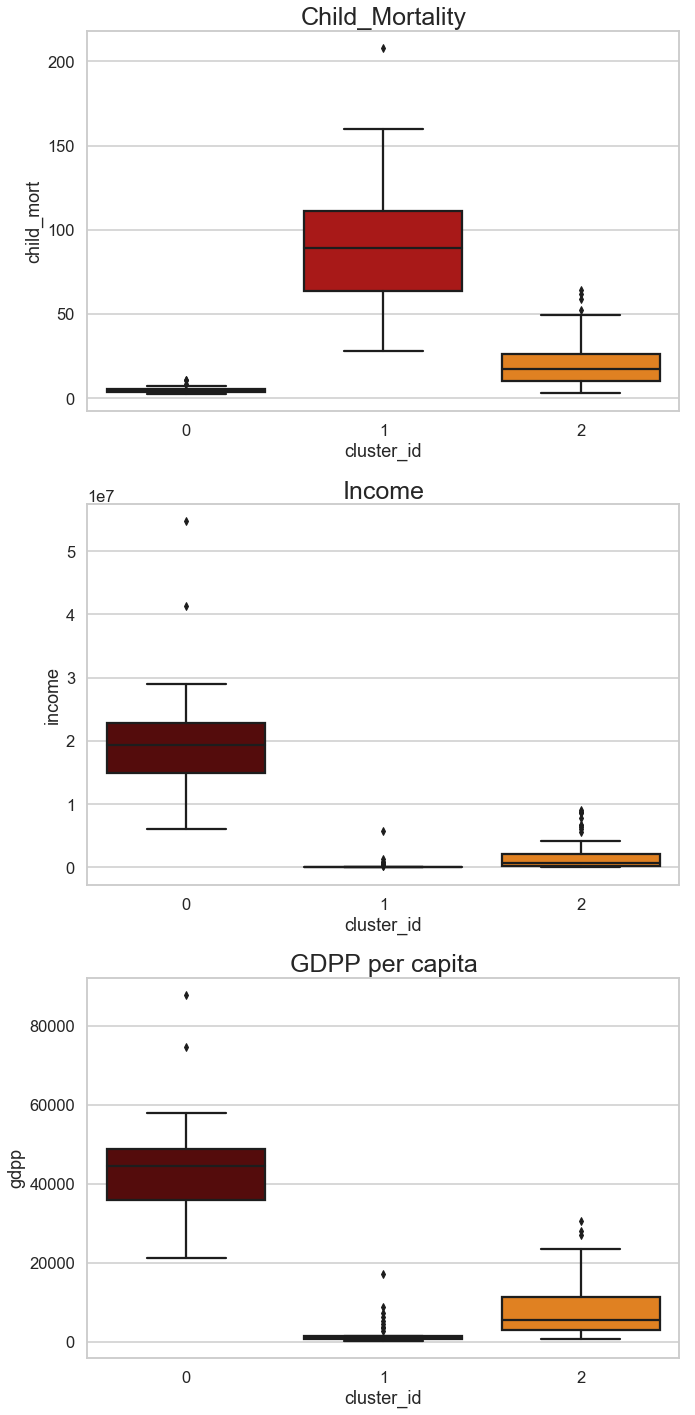

In [55]:
# Setting size of figure, context and gridlines
plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk') 

plt.subplot(3,1,1)                          # creating subplots
plt.title('Child_Mortality',fontsize=25)   # giving title with font size

# creating boxplot
sns.boxplot(x=new_country_data['cluster_id'],y=new_country_data['child_mort'],data=new_country_data,palette='gist_heat',orient='v',fliersize=5)
plt.subplot(3,1,2) 
plt.title('Income',fontsize=25)

# creating boxplot
sns.boxplot(x=new_country_data['cluster_id'],y=new_country_data['income'],data=new_country_data,palette='gist_heat',orient='v',fliersize=5)
plt.subplot(3,1,3)
plt.title('GDPP per capita',fontsize=25)

# creating boxplot
sns.boxplot(x=new_country_data['cluster_id'],y=new_country_data['gdpp'],data=new_country_data,palette='gist_heat',orient='v',fliersize=5)       
plt.tight_layout()

#### In summary, we can infer the below points from the above clusters:

1. Cluster 0: GDPP and income is the highest compared to other clusters, Mortality of children is the least compared to other clusters.
2. Cluster 1: Has the highest mortality rate in comparison to other clusters.
3. Cluster 2: GDPP, mortality and income is the normal compared to other clusters.

### K-Means Insights (Approach 2)

In [67]:
# Finding the countries with cluster label=1
Country_need_help = pd.DataFrame(new_country_data[new_country_data['cluster_id']==1].index)
Country_need_help.shape

(47, 1)

There are totally 47 countries from the dataset that need urgent help as they are having the lowest income, highest child mortality and lowest gdp per capita.

In [68]:
# Finding the countries with cluster label=0
Country_need_nohelp=pd.DataFrame(new_country_data[new_country_data['cluster_id']==0].index)
Country_need_nohelp.shape

(25, 1)

There are totally 25 countries having good socio-economic and health factors and hence do not require any help.

### Hierarchical Clustering: Single Linkage and Complete Linkage

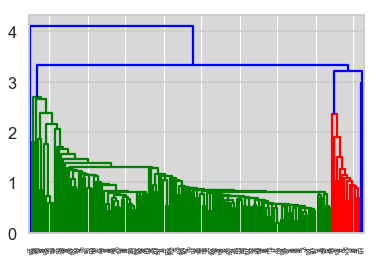

In [58]:
# Single linkage
mergings = linkage(new_scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

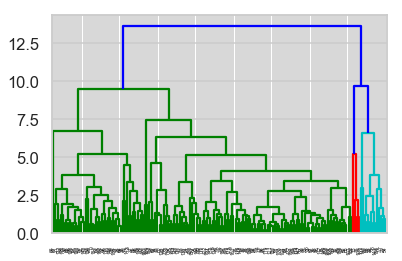

In [59]:
# Complete linkage
mergings = linkage(new_scaled_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

From the above dendrogram, we can proceed with 3 cluster

In [60]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0])

In [61]:
# Assign cluster labels
new_country_data['cluster_labels'] = cluster_labels
new_country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,1,0
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,2,0
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,2,0
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,1,0
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,2,0


#### Visualising the outliers with boxplot for child_mort, income and gdpp variables

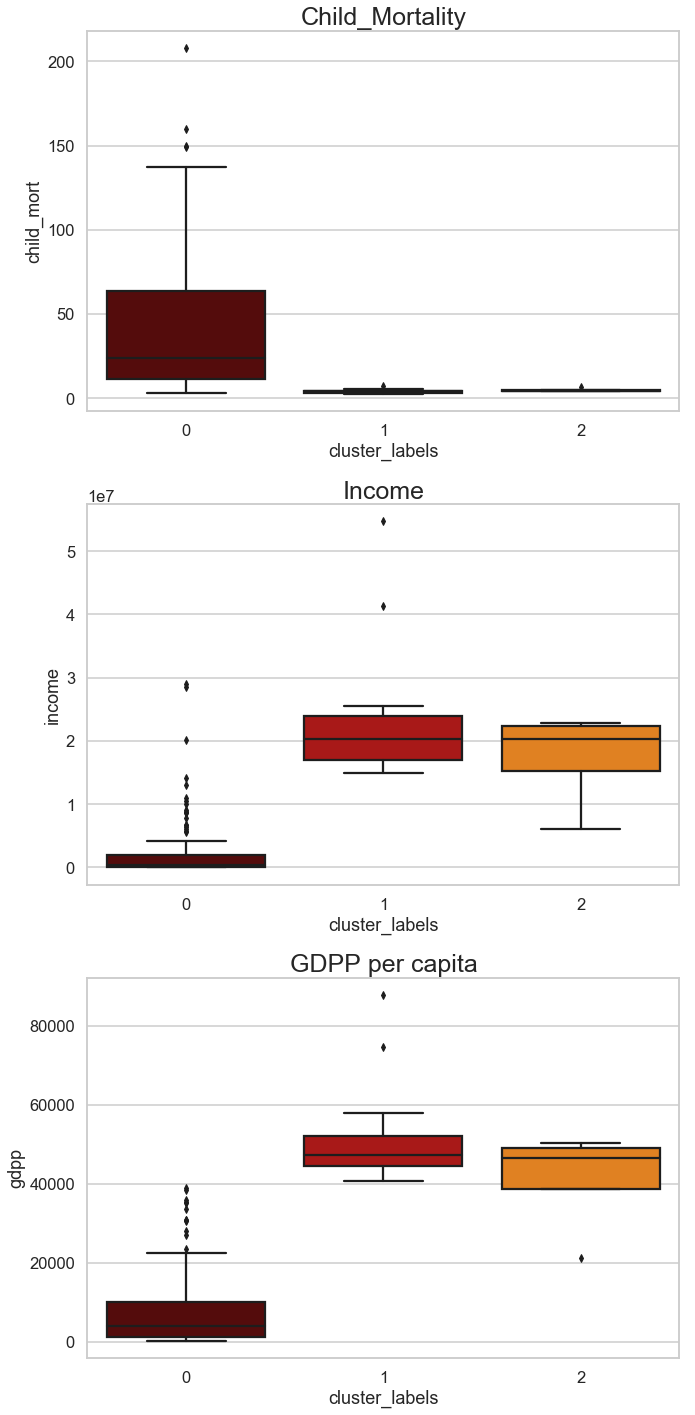

In [62]:
# Setting size of figure, context and gridlines
plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk') 

plt.subplot(3,1,1)                          # creating subplots
plt.title('Child_Mortality',fontsize=25)   # giving title with font size

# creating boxplot
sns.boxplot(x=new_country_data['cluster_labels'],y=new_country_data['child_mort'],data=new_country_data,palette='gist_heat',orient='v',fliersize=5)
plt.subplot(3,1,2)                         # creating subplots
plt.title('Income',fontsize=25)            # giving title with font size

# creating boxplot
sns.boxplot(x=new_country_data['cluster_labels'],y=new_country_data['income'],data=new_country_data,palette='gist_heat',orient='v',fliersize=5)
plt.subplot(3,1,3)                           # creating subplots
plt.title('GDPP per capita',fontsize=25)       # giving title with font size

# creating boxplot
sns.boxplot(x=new_country_data['cluster_labels'],y=new_country_data['gdpp'],data=new_country_data,palette='gist_heat',orient='v',fliersize=5)
plt.tight_layout()                      # setting the layout for better visual

#### In summary, we can infer the below points from the above clusters:

1. Cluster 0: gdpp and income is the lowest than others clusters, Mortality of children is very high compared to other clusters.
2. Cluster 1: gdpp and income are having decently high values, mortality of children is very low in here.
3. Cluster 2: gdpp and income is slightly lower than clusters 2, mortality of children is the least compared to other clusters

In [63]:
# Finding the countries with cluster label=0 as it shows they are not developed
Country_need_help_hier=pd.DataFrame(new_country_data[new_country_data['cluster_labels']==0].index)
Country_need_help_hier.shape

(146, 1)

There are totally 146 countries which need aid as they have the lowest income, highest child mortality and lowest gdp per capita.

In [64]:
# Finding the countries with cluster label=2 as it shows they are developed
Country_need_nohelp_hier=pd.DataFrame(new_country_data[new_country_data['cluster_labels']==2].index)
Country_need_nohelp_hier.shape

(4, 1)

There are 4 countries which are having good social-economic and health factors and hence do not require any aid.

## Conclusion - Approach 2
### K-Means vs Hierarchical Clustering
#### K-means clustering:
1. Countries that are direst need of aid
    1. Total 47 countries are in this category
2. Countries that are having good socio-economic and health factors:
    1. Total 25 countries are in this category

#### Hierarchical clustering:
1. Countries that are direst need of aid
    1. Total 146 countries are in this category
2. Countries that are having good socio-economic and health factors:
    1. Total 4 countries are in this category - Belgium, Ireland, Mali and Nepal

We have seen from both K-Means and Hierarchical clustering methods that hierarchical clustering selects an extra 99 countries. I would choose the final countries from hierarchical clustering as it gave accurate output than k-means clustering. I have compared the clusters and visualized from both methods and hierarchical clustering gave precise information than K-Means clustering.

## Final Conclusion
Among the conclusions drawn from approach 1 (including ouliers) and approach 2 (excluding outliers), approach 1 seems to be the more appropriate choice because it includes all the data points including the outliers. As per the business requirements, we have to find all the countries which are in direst need of aid, i.e., countries having low socio-economic and health factors.
Hence we can't exclude any countries from our dataset as it will create a major drawback in our model.
For example: let's take an outlier country 'Nigeria' which is having low socio-economic and health factors. If we exclude this outlier from the dataset, we will miss our main objective as it happened with approach 2. So, even though the model in approach 2 was greater than the previous model, we can't use it as it doesn't suits the business needs. Selecting approach 2 means we have to loose many countries which is not ideal from the business perspective.

The final list of 48 countries name needs to focus on the most are mentioned below:
1. Afghanistan
2. Angola
3. Benin
4. Botswana
5. Burundi
6. Cambodia
7. Canada
8. Chad
9. Chile
10. Congo, Dem. Rep.
11. Congo, Rep.
12. Costa Rica
13. Croatia
14. Equatorial Guinea
15. Eritrea
16. Gabon
17. Gambia
18. Ghana
19. Guinea
20. Guinea-Bissau
21. Iceland
22. Iraq
23. Kenya
24. Kiribati
25. Lao
26. Lesotho
27. Liberia
28. Madagascar
29. Malawi
30. Mali
31. Mauritania
32. Mozambique
33. Namibia
34. Niger
35. Nigeria
36. Pakistan
37. Rwanda
38. Senegal
39. Sierra Leone
40. Solomon Islands
41. South Africa
42. Sudan
43. Tanzania
44. Timor-Leste
45. Togo
46. Uganda
47. Yemen
48. Zambia